# Shell Scripting/Data Gathering

In [2]:
# imports
import subprocess
import time
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

In [6]:
# cuda script runner
def scriptRunner(n):
    # Replace with desired compiled program path from root to run
    binaryFilePath = "./parallel_reduction/thrust_implementation/pr_thrust"
    cmd = f"echo " + str(n) + " | " + binaryFilePath
    res = subprocess.run(cmd, capture_output=True, text=True, shell=True)
    
    data = res.stdout.split('\n')[0:2]

    return [n, [int(n) for n in data]]

In [7]:
# Generate Data
maxN = 65535
granularity = 50
nums = [n * (maxN // granularity) for n in range(granularity, 0, -1)]

data = []

for n in nums:
    data.append(scriptRunner(n))

print(data)

[[65500, [2145092250, 3166]], [64190, [2060145955, 3204]], [62880, [1976915760, 3247]], [61570, [1895401665, 3008]], [60260, [1815603670, 3018]], [58950, [1737521775, 2963]], [57640, [1661155980, 3004]], [56330, [1586506285, 2873]], [55020, [1513572690, 2776]], [53710, [1442355195, 2752]], [52400, [1372853800, 2707]], [51090, [1305068505, 2651]], [49780, [1238999310, 2948]], [48470, [1174646215, 2420]], [47160, [1112009220, 2366]], [45850, [1051088325, 2397]], [44540, [991883530, 2306]], [43230, [934394835, 2211]], [41920, [878622240, 2217]], [40610, [824565745, 3316]], [39300, [772225350, 2057]], [37990, [721601055, 1999]], [36680, [672692860, 1964]], [35370, [625500765, 1843]], [34060, [580024770, 1814]], [32750, [536264875, 1662]], [31440, [494221080, 1659]], [30130, [453893385, 1599]], [28820, [415281790, 1546]], [27510, [378386295, 1486]], [26200, [343206900, 1459]], [24890, [309743605, 1398]], [23580, [277996410, 1290]], [22270, [247965315, 1230]], [20960, [219650320, 1238]], [19

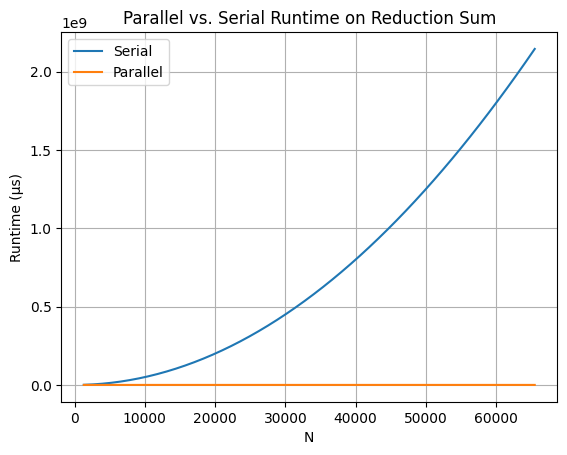

In [10]:
# Plot Data

x = [l[0] for l in data]
y = [l[1] for l in data]

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='N', ylabel='Runtime (µs)',
       title='Parallel vs. Serial Runtime on Reduction Sum')
ax.grid()

plt.legend(["Serial", "Parallel"])

fig.savefig("pr_thrust_runtime_plot.png")
plt.show()